In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
un_necessary_cols = ['id', 'member_id', 'emp_title']

In [4]:
cleaned_data = df.drop(un_necessary_cols, axis=1,inplace=False)

In [5]:
cleaned_data

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL


In [6]:
cleaned_data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [7]:
cleaned_data['emp_length'] = cleaned_data['emp_length'].str.replace("years","")

In [8]:
cleaned_data['emp_length'] = cleaned_data['emp_length'].str.replace("year", "")

In [9]:
cleaned_data['emp_length'].value_counts()

10+     8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length, dtype: int64

In [10]:
cleaned_data['emp_length']= cleaned_data['emp_length'].str.replace("10+","11")
cleaned_data['emp_length']= cleaned_data['emp_length'].str.replace("< 1","0.5")

In [11]:
cleaned_data['emp_length']= cleaned_data['emp_length'].str.replace("+","")

In [12]:
cleaned_data['emp_length'] = cleaned_data['emp_length'].astype('float')

In [13]:
cleaned_data['emp_length']

0        11.0
1         0.5
2        11.0
3        11.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.5
39715     0.5
39716     0.5
Name: emp_length, Length: 39717, dtype: float64

In [14]:
cleaned_data['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [15]:
cleaned_data['int_rate'] = cleaned_data['int_rate'].str.replace("%", "").astype("float")

In [16]:
cleaned_data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [17]:
cleaned_data['emp_length'].value_counts()

11.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [18]:
max_exp = cleaned_data['emp_length'].max()

In [19]:
max_exp

11.0

In [20]:
min_exp = cleaned_data['emp_length'].min()

In [21]:
min_exp

0.5

In [22]:
cleaned_data['emp_length'].fillna(11.0,inplace=True)

In [23]:
round(cleaned_data.isnull().sum()/cleaned_data.shape[0] * 100, 2)

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.40
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
revol_bal              0.00
revol_util             0.13
application_type       0.00
dtype: float64

In [24]:
cleaned_data.dropna(inplace=True)

In [25]:
cleaned_data.shape[0]

39496

In [26]:
round(cleaned_data.isnull().sum()/cleaned_data.shape[0] * 100, 2)

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
revol_bal              0.0
revol_util             0.0
application_type       0.0
dtype: float64

In [27]:
cleaned_data.rename(columns={"loan_amnt": "loan_amount"}, inplace=True, errors="")

In [28]:
cleaned_data

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
0,5000,4975.0,36 months,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
2,2400,2400.0,36 months,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL
3,10000,10000.0,36 months,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,8500,875.0,36 months,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL
39714,5000,1325.0,36 months,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL
39715,5000,650.0,36 months,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL


In [29]:
# replace index
df.rename(index={0: "x", 1: "y", 2: "z"})

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
x,1077501,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL
y,1077430,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
z,1077175,1313524,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL
3,1076863,1277178,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,1075358,1311748,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,90665,90607,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL
39714,90395,90390,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL
39715,90376,89243,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL


In [30]:
cleaned_data

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
0,5000,4975.0,36 months,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
2,2400,2400.0,36 months,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL
3,10000,10000.0,36 months,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,8500,875.0,36 months,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL
39714,5000,1325.0,36 months,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL
39715,5000,650.0,36 months,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL


In [31]:
cleaned_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            39707, 39708, 39709, 39710, 39711, 39712, 39713, 39714, 39715,
            39716],
           dtype='int64', length=39496)

In [32]:
# rename index from int to str
df.rename(index=str).index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '39707', '39708', '39709', '39710', '39711', '39712', '39713', '39714',
       '39715', '39716'],
      dtype='object', length=39717)

In [33]:
# Data Preparation

In [34]:
cleaned_data['annual_inc']

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39496, dtype: float64

In [35]:
cleaned_data.loc[:,['annual_inc', 'loan_status']]

,annual_inc,loan_status
0,24000.0,Fully Paid
1,30000.0,Charged Off
2,12252.0,Fully Paid
3,49200.0,Fully Paid
4,80000.0,Current
...,...,...
39712,110000.0,Fully Paid
39713,18000.0,Fully Paid
39714,100000.0,Fully Paid
39715,200000.0,Fully Paid


In [36]:
cleaned_data['annual_inc'].describe()

count    3.949600e+04
mean     6.903940e+04
std      6.389185e+04
min      4.000000e+03
25%      4.056000e+04
50%      5.900400e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [37]:
#Bucketiation continuous variable --> categorical
#Binning

In [38]:
cleaned_data['annual_inc'].min()

4000.0

In [39]:
# percenate of different level of annual
cleaned_data['annual_inc'].quantile([.25, .50, .75, .90])

0.25     40560.0
0.50     59004.0
0.75     82500.0
0.90    116000.0
Name: annual_inc, dtype: float64

In [40]:
# low income - 0 - 50000
# mid income - 50001 - 100000
# high income - > 100000
def annual_inc_conversion(x):
    if x<=50000:
        return "low income"
    elif x > 50000 and x <= 100000:
        return "mid income"
    else:
        return "high income"

In [41]:
annual_inc_conversion(100)

'low income'

In [42]:
cleaned_data['annual_inc'].apply(lambda x:annual_inc_conversion(x))

0         low income
1         low income
2         low income
3         low income
4         mid income
            ...     
39712    high income
39713     low income
39714     mid income
39715    high income
39716     low income
Name: annual_inc, Length: 39496, dtype: object

In [43]:
cleaned_data['annual_inc_category'] = cleaned_data['annual_inc'].apply(lambda x:annual_inc_conversion(x))

In [44]:
cleaned_data['annual_inc_category']

0         low income
1         low income
2         low income
3         low income
4         mid income
            ...     
39712    high income
39713     low income
39714     mid income
39715    high income
39716     low income
Name: annual_inc_category, Length: 39496, dtype: object

In [45]:
cleaned_data['annual_inc_category'].reset_index(drop=True, inplace=True)

In [46]:
cleaned_data['annual_inc_category']

0         low income
1         low income
2         low income
3         low income
4         mid income
            ...     
39491    high income
39492     low income
39493     mid income
39494    high income
39495     low income
Name: annual_inc_category, Length: 39496, dtype: object

In [47]:
cleaned_data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39496, dtype: float64

In [48]:
cleaned_data['int_rate'].quantile([.7, .8, .15])

0.70    13.87
0.80    15.27
0.15     7.51
Name: int_rate, dtype: float64

In [49]:
def int_rate_conversion(x):
    if x<=7.8:
        return "low interest rate"
    elif x > 7.8 and x <= 15:
        return "mid interest rate"
    else:
        return "high interest rate"

In [50]:
cleaned_data['int_rate_category'] = cleaned_data['int_rate'].apply(lambda x:int_rate_conversion(x))

In [51]:
cleaned_data['int_rate_category'].value_counts()

mid interest rate     24339
high interest rate     8452
low interest rate      6705
Name: int_rate_category, dtype: int64

In [52]:
cleaned_data.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'revol_bal', 'revol_util', 'application_type', 'annual_inc_category',
       'int_rate_category'],
      dtype='object')

In [53]:
cleaned_data['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39496, dtype: object

In [54]:
cleaned_data = cleaned_data[cleaned_data['loan_status'] != "Current"]

In [55]:
cleaned_data['loan_status'].value_counts()

Fully Paid     32783
Charged Off     5577
Name: loan_status, dtype: int64

In [56]:
cleaned_data['purpose'].value_counts()

debt_consolidation    17950
credit_card            4988
other                  3847
home_improvement       2865
major_purchase         2140
small_business         1744
car                    1493
wedding                 925
medical                 675
moving                  572
vacation                373
house                   366
educational             320
renewable_energy        102
Name: purpose, dtype: int64

In [57]:
cleaned_data["int_rate_category"].value_counts()

mid interest rate     23742
high interest rate     7920
low interest rate      6698
Name: int_rate_category, dtype: int64

In [58]:
cleaned_data['annual_inc_category'].value_counts()

mid income     17632
low income     15262
high income     5466
Name: annual_inc_category, dtype: int64

In [59]:
cleaned_data['emp_length'].value_counts()

11.0    9481
0.5     4482
2.0     4265
3.0     3996
4.0     3320
5.0     3167
1.0     3146
6.0     2157
7.0     1699
8.0     1425
9.0     1222
Name: emp_length, dtype: int64

In [60]:
cleaned_data['loan_amount'].min()

500

In [61]:
cleaned_data['loan_amount'].max()

35000

In [62]:
cleaned_data.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'revol_bal', 'revol_util', 'application_type', 'annual_inc_category',
       'int_rate_category'],
      dtype='object')

In [63]:
cleaned_data.groupby(['annual_inc_category','loan_status']).size().reset_index(name="Count")

,annual_inc_category,loan_status,Count
0,high income,Charged Off,592
1,high income,Fully Paid,4874
2,low income,Charged Off,2582
3,low income,Fully Paid,12680
4,mid income,Charged Off,2403
5,mid income,Fully Paid,15229


In [64]:
cleaned_data.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'revol_bal', 'revol_util', 'application_type', 'annual_inc_category',
       'int_rate_category'],
      dtype='object')

In [65]:
cleaned_data.groupby(['int_rate_category','loan_status']).size().reset_index(name="Count")

,int_rate_category,loan_status,Count
0,high interest rate,Charged Off,2063
1,high interest rate,Fully Paid,5857
2,low interest rate,Charged Off,340
3,low interest rate,Fully Paid,6358
4,mid interest rate,Charged Off,3174
5,mid interest rate,Fully Paid,20568


In [66]:
cleaned_data.groupby(['verification_status','loan_status']).size().reset_index(name="Count")

,verification_status,loan_status,Count
0,Not Verified,Charged Off,2121
1,Not Verified,Fully Paid,14478
2,Source Verified,Charged Off,1421
3,Source Verified,Fully Paid,8200
4,Verified,Charged Off,2035
5,Verified,Fully Paid,10105


In [67]:
import numpy as np
cleaned_data.groupby(['loan_status'])['loan_amount'].agg(np.mean)

loan_status
Charged Off    12117.204590
Fully Paid     10869.536803
Name: loan_amount, dtype: float64

In [68]:
cleaned_data.groupby(['loan_status','purpose']).size().reset_index(name="Count")

,loan_status,purpose,Count
0,Charged Off,car,159
1,Charged Off,credit_card,536
2,Charged Off,debt_consolidation,2741
3,Charged Off,educational,56
4,Charged Off,home_improvement,343
5,Charged Off,house,59
6,Charged Off,major_purchase,220
7,Charged Off,medical,105
8,Charged Off,moving,92
9,Charged Off,other,627


In [69]:
cleaned_data.dtypes

loan_amount              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
revol_bal                int64
revol_util              object
application_type        object
annual_inc_category     object
int_rate_category       object
dtype: object

In [70]:
cleaned_data

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type,annual_inc_category,int_rate_category
0,5000,4975.0,36 months,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL,low income,mid interest rate
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL,low income,high interest rate
2,2400,2400.0,36 months,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL,low income,high interest rate
3,10000,10000.0,36 months,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL,low income,mid interest rate
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,7963,28.30%,INDIVIDUAL,low income,mid interest rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL,high income,mid interest rate
39713,8500,875.0,36 months,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL,low income,mid interest rate
39714,5000,1325.0,36 months,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL,mid income,mid interest rate
39715,5000,650.0,36 months,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL,high income,low interest rate


In [71]:
cleaned_data['home_ownership'].value_counts()

RENT        18347
MORTGAGE    16958
OWN          2956
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [72]:
pd.get_dummies(cleaned_data['home_ownership'])

,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
5,0,0,0,0,1
...,...,...,...,...,...
39712,1,0,0,0,0
39713,0,0,0,0,1
39714,1,0,0,0,0
39715,1,0,0,0,0


In [73]:
home_ownership_dummies = pd.get_dummies(cleaned_data['home_ownership'],prefix='home_ownership')

In [74]:
home_ownership_dummies

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
5,0,0,0,0,1
...,...,...,...,...,...
39712,1,0,0,0,0
39713,0,0,0,0,1
39714,1,0,0,0,0
39715,1,0,0,0,0


In [75]:
cleaned_data_final = pd.concat([cleaned_data, home_ownership_dummies], axis=1)

In [76]:
cleaned_data_final

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,application_type,annual_inc_category,int_rate_category,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,4975.0,36 months,10.65,162.87,B,B2,11.0,RENT,24000.0,...,13648,83.70%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,1687,9.40%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,11.0,RENT,12252.0,...,2956,98.50%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
3,10000,10000.0,36 months,13.49,339.31,C,C1,11.0,RENT,49200.0,...,5598,21%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,7963,28.30%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,...,7274,13.10%,INDIVIDUAL,high income,mid interest rate,1,0,0,0,0
39713,8500,875.0,36 months,10.28,275.38,C,C1,3.0,RENT,18000.0,...,8847,26.90%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
39714,5000,1325.0,36 months,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,...,9698,19.40%,INDIVIDUAL,mid income,mid interest rate,1,0,0,0,0
39715,5000,650.0,36 months,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,...,85607,0.70%,INDIVIDUAL,high income,low interest rate,1,0,0,0,0


In [77]:
cleaned_data_final.drop('home_ownership', axis=1, inplace=True)

In [78]:
cleaned_data_final

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,...,revol_bal,revol_util,application_type,annual_inc_category,int_rate_category,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,4975.0,36 months,10.65,162.87,B,B2,11.0,24000.0,Verified,...,13648,83.70%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,30000.0,Source Verified,...,1687,9.40%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,11.0,12252.0,Not Verified,...,2956,98.50%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
3,10000,10000.0,36 months,13.49,339.31,C,C1,11.0,49200.0,Source Verified,...,5598,21%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,36000.0,Source Verified,...,7963,28.30%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,A,A4,4.0,110000.0,Not Verified,...,7274,13.10%,INDIVIDUAL,high income,mid interest rate,1,0,0,0,0
39713,8500,875.0,36 months,10.28,275.38,C,C1,3.0,18000.0,Not Verified,...,8847,26.90%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
39714,5000,1325.0,36 months,8.07,156.84,A,A4,0.5,100000.0,Not Verified,...,9698,19.40%,INDIVIDUAL,mid income,mid interest rate,1,0,0,0,0
39715,5000,650.0,36 months,7.43,155.38,A,A2,0.5,200000.0,Not Verified,...,85607,0.70%,INDIVIDUAL,high income,low interest rate,1,0,0,0,0


In [79]:
cleaned_data_final['grade']

0        B
1        C
2        C
3        C
5        A
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 38360, dtype: object

In [80]:
grade_conversion_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}

In [81]:
cleaned_data_final['grade'] = cleaned_data_final['grade'].map(grade_conversion_dict)

In [82]:
cleaned_data_final['grade'] = cleaned_data_final['grade'].astype('Int64')

In [83]:
cleaned_data_final['grade']

0        2
1        3
2        3
3        3
5        1
        ..
39712    1
39713    3
39714    1
39715    1
39716    5
Name: grade, Length: 38360, dtype: Int64

In [84]:
# Data visualization

In [85]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [86]:
import seaborn as sns

In [87]:
cleaned_data_final

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,...,revol_bal,revol_util,application_type,annual_inc_category,int_rate_category,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,4975.0,36 months,10.65,162.87,2,B2,11.0,24000.0,Verified,...,13648,83.70%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
1,2500,2500.0,60 months,15.27,59.83,3,C4,0.5,30000.0,Source Verified,...,1687,9.40%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
2,2400,2400.0,36 months,15.96,84.33,3,C5,11.0,12252.0,Not Verified,...,2956,98.50%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
3,10000,10000.0,36 months,13.49,339.31,3,C1,11.0,49200.0,Source Verified,...,5598,21%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
5,5000,5000.0,36 months,7.90,156.46,1,A4,3.0,36000.0,Source Verified,...,7963,28.30%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,1,A4,4.0,110000.0,Not Verified,...,7274,13.10%,INDIVIDUAL,high income,mid interest rate,1,0,0,0,0
39713,8500,875.0,36 months,10.28,275.38,3,C1,3.0,18000.0,Not Verified,...,8847,26.90%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
39714,5000,1325.0,36 months,8.07,156.84,1,A4,0.5,100000.0,Not Verified,...,9698,19.40%,INDIVIDUAL,mid income,mid interest rate,1,0,0,0,0
39715,5000,650.0,36 months,7.43,155.38,1,A2,0.5,200000.0,Not Verified,...,85607,0.70%,INDIVIDUAL,high income,low interest rate,1,0,0,0,0


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='term', ylabel='count'>

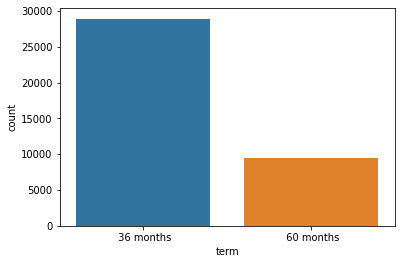

In [88]:
sns.countplot(cleaned_data_final['term'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='verification_status', ylabel='count'>

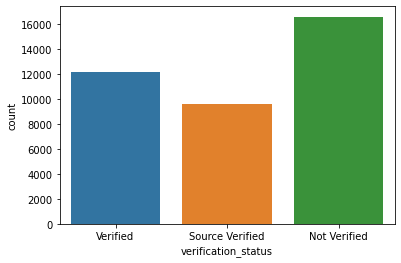

In [89]:
sns.countplot(cleaned_data_final['verification_status'])

In [90]:
cleaned_data_final.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util',
       'application_type', 'annual_inc_category', 'int_rate_category',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


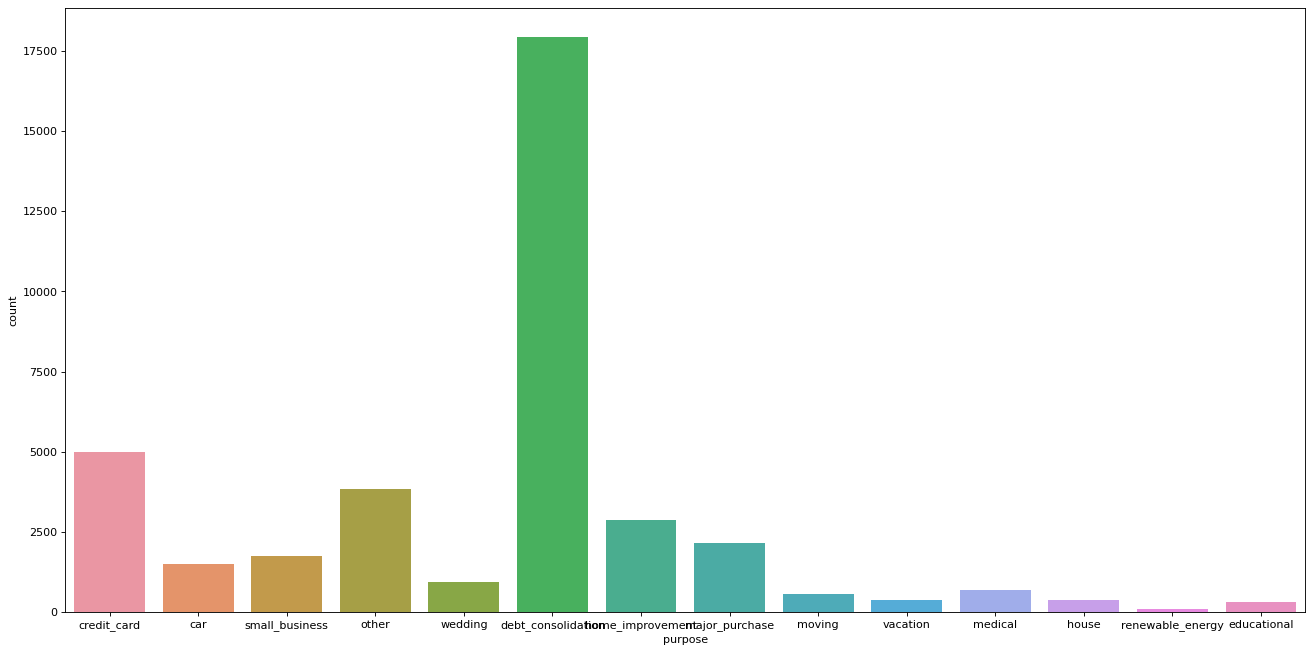

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10), dpi=80)
sns.countplot(cleaned_data_final['purpose'])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

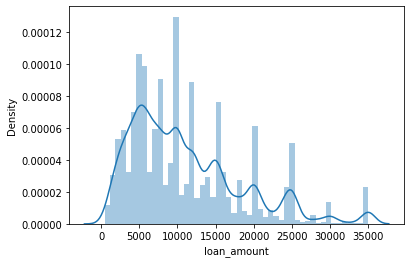

In [92]:
sns.distplot(cleaned_data_final['loan_amount'])

In [93]:
cleaned_data_final.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util',
       'application_type', 'annual_inc_category', 'int_rate_category',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment', ylabel='Density'>

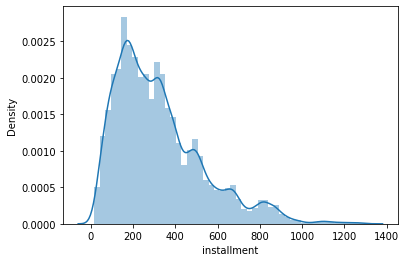

In [94]:
sns.distplot(cleaned_data_final['installment'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_status', ylabel='count'>

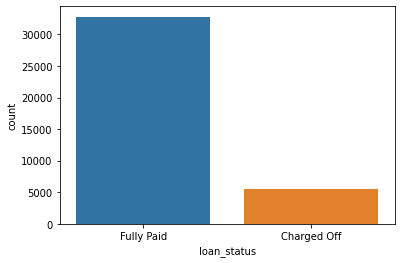

In [95]:
sns.countplot(cleaned_data_final['loan_status'])

In [96]:
cleaned_data_final

,loan_amount,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,...,revol_bal,revol_util,application_type,annual_inc_category,int_rate_category,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,4975.0,36 months,10.65,162.87,2,B2,11.0,24000.0,Verified,...,13648,83.70%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
1,2500,2500.0,60 months,15.27,59.83,3,C4,0.5,30000.0,Source Verified,...,1687,9.40%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
2,2400,2400.0,36 months,15.96,84.33,3,C5,11.0,12252.0,Not Verified,...,2956,98.50%,INDIVIDUAL,low income,high interest rate,0,0,0,0,1
3,10000,10000.0,36 months,13.49,339.31,3,C1,11.0,49200.0,Source Verified,...,5598,21%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
5,5000,5000.0,36 months,7.90,156.46,1,A4,3.0,36000.0,Source Verified,...,7963,28.30%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07,78.42,1,A4,4.0,110000.0,Not Verified,...,7274,13.10%,INDIVIDUAL,high income,mid interest rate,1,0,0,0,0
39713,8500,875.0,36 months,10.28,275.38,3,C1,3.0,18000.0,Not Verified,...,8847,26.90%,INDIVIDUAL,low income,mid interest rate,0,0,0,0,1
39714,5000,1325.0,36 months,8.07,156.84,1,A4,0.5,100000.0,Not Verified,...,9698,19.40%,INDIVIDUAL,mid income,mid interest rate,1,0,0,0,0
39715,5000,650.0,36 months,7.43,155.38,1,A2,0.5,200000.0,Not Verified,...,85607,0.70%,INDIVIDUAL,high income,low interest rate,1,0,0,0,0


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='installment'>

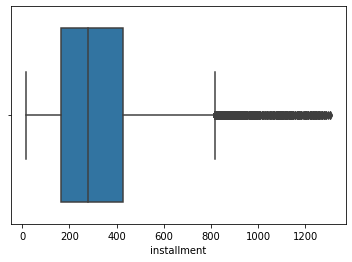

In [97]:
sns.boxplot(cleaned_data_final['installment'])

<AxesSubplot:xlabel='installment', ylabel='Count'>

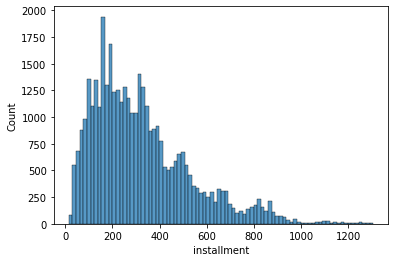

In [98]:
sns.histplot(cleaned_data_final['installment'])

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

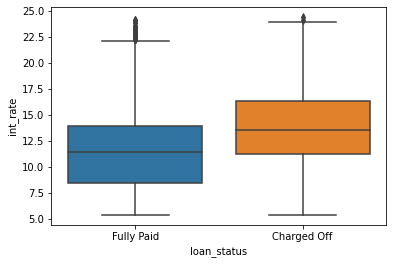

In [99]:
sns.boxplot(y='int_rate', x='loan_status', data=cleaned_data_final)

In [100]:
cleaned_data_final.columns

Index(['loan_amount', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util',
       'application_type', 'annual_inc_category', 'int_rate_category',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

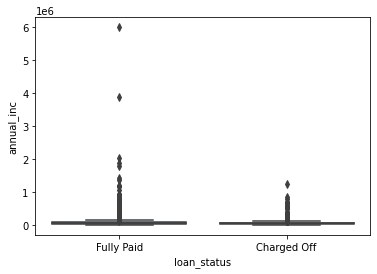

In [101]:
sns.boxplot(y='annual_inc', x='loan_status', data=cleaned_data_final)

<AxesSubplot:xlabel='verification_status', ylabel='annual_inc'>

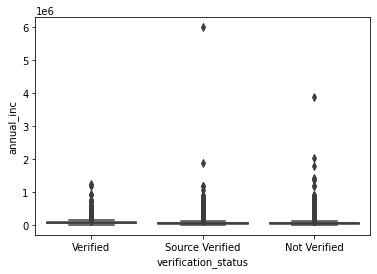

In [102]:
sns.boxplot(x='verification_status', y='annual_inc', data=cleaned_data_final)

<AxesSubplot:xlabel='term', ylabel='count'>

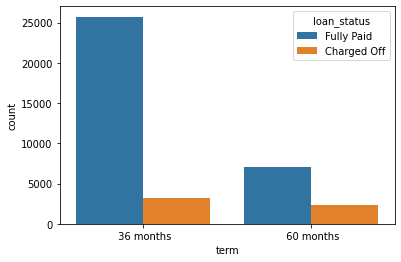

In [105]:
sns.countplot(x='term', hue='loan_status', data=cleaned_data_final)

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

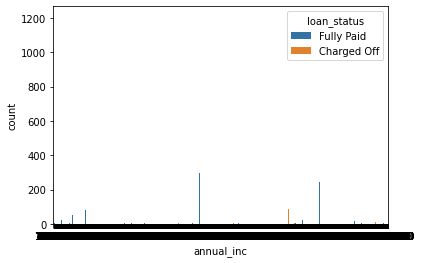

In [104]:
sns.countplot(x='annual_inc', hue='loan_status', data=cleaned_data_final)

<AxesSubplot:xlabel='annual_inc'>

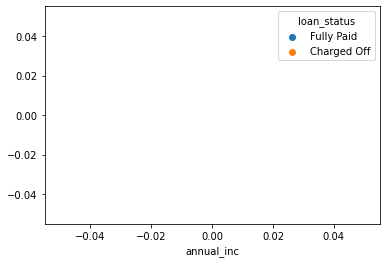

In [106]:
sns.scatterplot(x='annual_inc', hue='loan_status', data=cleaned_data_final)

<AxesSubplot:xlabel='int_rate', ylabel='loan_amount'>

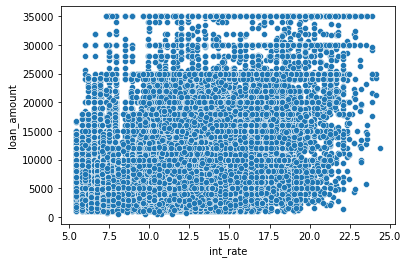

In [110]:
sns.scatterplot(x='int_rate', y='loan_amount', data=cleaned_data_final)

<AxesSubplot:xlabel='int_rate', ylabel='loan_amount'>

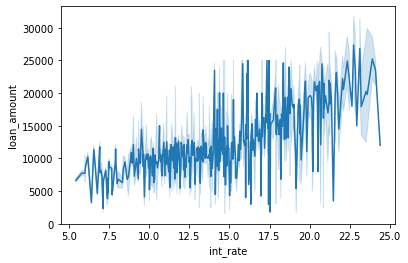

In [109]:
sns.lineplot(x='int_rate', y='loan_amount', data=cleaned_data_final)

In [111]:
# Multi-veriate analysis

<AxesSubplot:xlabel='verification_status', ylabel='int_rate'>

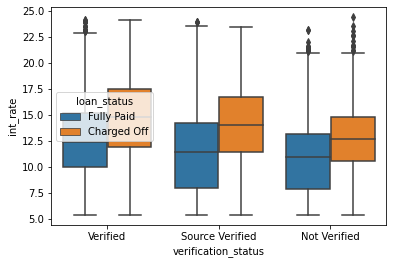

In [112]:
sns.boxplot(y='int_rate', x='verification_status', hue='loan_status', data=cleaned_data_final)

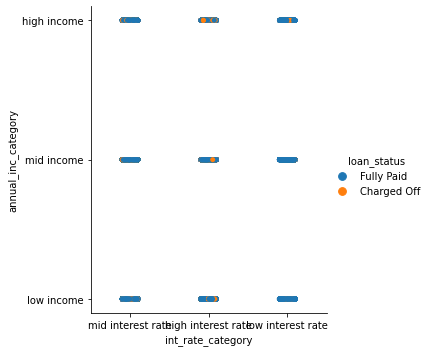

In [115]:
sns.catplot(y='annual_inc_category', x='int_rate_category', hue='loan_status', data=cleaned_data_final)

<AxesSubplot:xlabel='loan_status'>

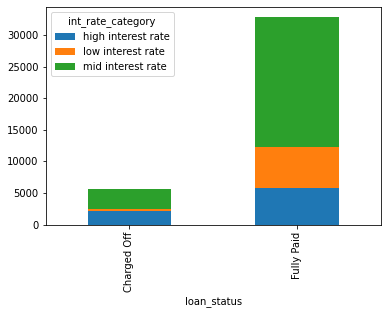

In [119]:
cleaned_data_final.groupby(['loan_status', 'int_rate_category']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='loan_status'>

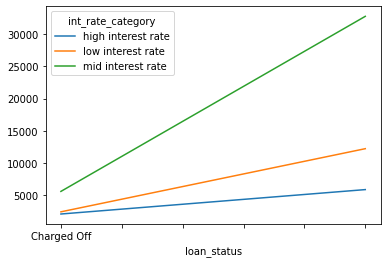

In [120]:
cleaned_data_final.groupby(['loan_status', 'int_rate_category']).size().unstack().plot(kind='line', stacked=True)

<AxesSubplot:xlabel='loan_status'>

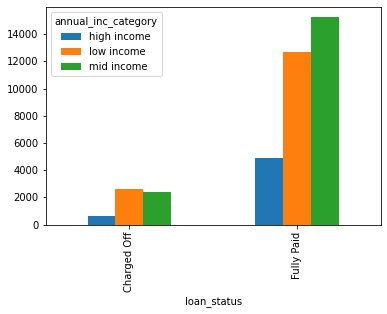

In [125]:
cleaned_data_final.groupby(['loan_status', 'annual_inc_category']).size().unstack().plot(kind='bar', stacked=False)